In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#from matplotlib.colors import ListedColormap
#from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from subprocess import call
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

import xgboost as xgb

import seaborn as sns

from termcolor import colored



#from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier
#import xgboost

from matplotlib.colors import ListedColormap
%pylab inline

pd.options.mode.chained_assignment = None  # default='warn'

Populating the interactive namespace from numpy and matplotlib


C:\Users\afecn\anaconda3.1\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
feature = [
 'Cl/min_day',
 'Cl/max_day',
 'max_day-min_day',
 'ADX_5',
 'ADX_14',
 'ADX_28',
 'ADXR_5',
 'ADXR_14',
 'ADXR_28',
 'APO_5',
 'APO_14',
 'APO_28',
 'AROONOSC_5',
 'AROONOSC_14',
 'AROONOSC_28',
 'BOP_5',
 'BOP_14',
 'BOP_28',
 'CCI_5',
 'CCI_14',
 'CCI_28',
 'CMO_5',
 'CMO_14',
 'CMO_28',
 'DX_5',
 'DX_14',
 'DX_28',
 'MFI_5',
 'MFI_14',
 'MFI_28',
 'MINUS_DI_5',
 'MINUS_DI_14',
 'MINUS_DI_28',
 'MINUS_DM_5',
 'MINUS_DM_14',
 'MINUS_DM_28',
 'MOM_5',
 'MOM_14',
 'MOM_28',
 'PLUS_DI_5',
 'PLUS_DI_14',
 'PLUS_DI_28',
 'PLUS_DM_5',
 'PLUS_DM_14',
 'PLUS_DM_28',
 'PPO_5',
 'PPO_14',
 'PPO_28',
 'ROC_5',
 'ROC_14',
 'ROC_28',
 'ROCP_5',
 'ROCP_14',
 'ROCP_28',
 'ROCR_5',
 'ROCR_14',
 'ROCR_28',
 'ROCR100_5',
 'ROCR100_14',
 'ROCR100_28',
 'RSI_5',
 'RSI_14',
 'RSI_28',
 'TRIX_5',
 'TRIX_14',
 'TRIX_28',
 'ULTOSC_5',
 'ULTOSC_14',
 'ULTOSC_28',
 'WILLR_5',
 'WILLR_14',
 'WILLR_28',
 'HT_DCPERIOD_5',
 'HT_DCPERIOD_14',
 'HT_DCPERIOD_28',
 'HT_DCPHASE_5',
 'HT_DCPHASE_14',
 'HT_DCPHASE_28',
 'HT_TRENDMODE_5',
 'HT_TRENDMODE_14',
 'HT_TRENDMODE_28',
 'DEMA_5',
 'DEMA_14',
 'DEMA_28',
 'EMA_5',
 'EMA_14',
 'EMA_28',
 'HT_TRENDLINE_5',
 'HT_TRENDLINE_14',
 'HT_TRENDLINE_28',
 'KAMA_5',
 'KAMA_14',
 'KAMA_28',
 'MA_5',
 'MA_14',
 'MA_28',
 'MIDPOINT_5',
 'MIDPOINT_14',
 'MIDPOINT_28',
 'MIDPRICE_5',
 'MIDPRICE_14',
 'MIDPRICE_28',
 'SMA_5',
 'SMA_14',
 'SMA_28',
 'T3_5',
 'T3_14',
 'T3_28',
 'TEMA_5',
 'TEMA_14',
 'TEMA_28',
 'TRIMA_5',
 'TRIMA_14',
 'TRIMA_28',
 'WMA_5',
 'WMA_14',
 'WMA_28',
 'ATR_5',
 'ATR_14',
 'ATR_28',
 'NATR_5',
 'NATR_14',
 'NATR_28',
 'TRANGE_5',
 'TRANGE_14',
 'TRANGE_28',
 'AD_5',
 'AD_14',
 'AD_28',
 'ADOSC_5',
 'ADOSC_14',
 'ADOSC_28',
 'OBV_5',
 'OBV_14',
 'OBV_28',
 'AROON_aroondown',
 'AROON_aroonup',
 'MACD_macd',
 'MACD_macdsignal',
 'MACD_macdhist',
 'MACDEXT_macd',
 'MACDEXT_macdsignal',
 'MACDEXT_macdhist',
 'MACDFIX_macd',
 'MACDFIX_macdsignal',
 'MACDFIX_macdhist',
 'STOCH_slowk',
 'STOCH_slowd',
 'STOCHF_fastk',
 'STOCHF_fastd',
 'STOCHRSI_fastk',
 'STOCHRSI_fastd',
 'HT_PHASOR_inphase',
 'HT_PHASOR_quadrature',
 'HT_SINE_sine',
 'HT_SINE_leadsine',
 'BBANDS_upperband',
 'BBANDS_middleband',
 'BBANDS_lowerband',
 'MAMA_mama',
 'MAMA_fama',
 'Min10',
 'Min1000',
 'Min10_1300',
 'Min10_1000'
]

In [3]:

#разбивка датасетов
def dating(year):
    X_all_16 = X_all[                         (data[column] != year)]
    X_all_19 = X_all[                         (data[column] ==  year)]
    y_all_16 = y_all[                         (data[column] != year)]
    y_all_19 = y_all[                         (data[column] ==  year)]
    X_train, X_test, y_train, y_test = train_test_split(
    X_all_16,
    y_all_16, 
    test_size = 0.3,
    random_state = 1)
    return X_train, X_test, y_train, y_test, X_all_16, y_all_16, X_all_19, y_all_19 

#прогнозы
def result_(varP, varM):
    tablep = pd.pivot_table(
    matrix_year[(matrix_year['2proba']>=varP) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    
    tablem = pd.pivot_table(
    matrix_year[(matrix_year['1proba']>varM) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    table = pd.concat([tablep, tablem], axis=1)
#    table.columns = ['Profit%_c','Count','Profit%','Profit+-']
#    table.pop('Profit%_c')
    return table

def feat_():
    tablef = pd.pivot_table(
    matrix_year[(matrix_year[column] >200)],                      
            margins=True, index=all, values = 'f_' + X_train.columns,        
            aggfunc=['mean']).round(2)
    return tablef
    

In [4]:
%%time

# #TA+4block
TA_block4   = pd.read_csv('E:/Host/Data/Database/10min/TA_block4.csv',   parse_dates=['Date', 'Time'])
# #создать target
profit_TIME = pd.read_csv('E:/Host/Data/Database/10min/profit_TIME_1840.csv', parse_dates=['Date', 'Time'])

#TA+4block
#TA_block4   = pd.read_csv('TA_block4.csv', parse_dates=['Date', 'Time'])
#создать target
#profit_TIME = pd.read_csv('profit_TIME.csv', parse_dates=['Date', 'Time'])

Wall time: 34.5 s


In [14]:
aal = pd.merge(TA_block4, profit_TIME, on = ['Date', 'Time', 'Symbol'], how='inner')

In [17]:
aal[feature].corr()

,Min10,Min1000,Min10_1300,Min10_1000,Cl/min_day,Cl/max_day,max_day-min_day
Min10,1.000000,0.645652,0.808871,0.732875,0.365130,0.485598,-0.091536
Min1000,0.645652,1.000000,0.511548,0.441437,0.618628,0.659501,-0.037634
Min10_1300,0.808871,0.511548,1.000000,0.919664,0.265039,0.387334,-0.091952
Min10_1000,0.732875,0.441437,0.919664,1.000000,0.223722,0.338267,-0.085362
Cl/min_day,0.365130,0.618628,0.265039,0.223722,1.000000,0.011803,0.692593
Cl/max_day,0.485598,0.659501,0.387334,0.338267,0.011803,1.000000,-0.711181
max_day-min_day,-0.091536,-0.037634,-0.091952,-0.085362,0.692593,-0.711181,1.000000


In [5]:
Target_list = ['ProftLaBa', 'Proft1000', 'Proft1300', 'Proft1830', 'Profi_GEP', 'Pro_Morni',]
feature =  [
'Min10',
'Min1000',
'Min10_1300',
'Min10_1000',
'Cl/min_day',
'Cl/max_day',
'max_day-min_day',


           ]

In [6]:
# к TA_block4 добавлаям профиты по отсечке
def shose(from_):
#     display(TA_block4   .shape)
#     display(profit_TIME.shape)
#    display(TA_block4[TA_block4['Time'] == from_].shape)
#    display(profit_TIME[profit_TIME['Time'] == from_].shape)

    df = pd.merge(TA_block4[TA_block4['Time'].dt.time == from_], profit_TIME[profit_TIME['Time'].dt.time == from_], on = ['Date', 'Time', 'Symbol'], how='inner')

#    display(df.shape)
    df.drop_duplicates(['Date', 'Time', 'Symbol'], inplace = True)
#    display(df.shape)
    df.dropna(inplace = True)
#    display(df)
    return(df)

In [7]:
%%time

# сама модель БЕЗ ВЫБОРА ФИЧЕЙ 

n_ = 2

feat_importances = pd.DataFrame()
matrix   = pd.DataFrame()
matrix_year_nul = pd.DataFrame()
matrix_2 = pd.DataFrame()
matrix_100 = pd.DataFrame()
matrix_2_100  = pd.DataFrame()
matrix_year   = pd.DataFrame()

matrix_year_h = pd.DataFrame()

forecast = pd.DataFrame()

for from_ in [datetime.time(10,50,0), datetime.time(11,50,0),datetime.time(12,50,0),datetime.time(13,50,0),datetime.time(14,50,0),datetime.time(15,50,0),datetime.time(16,50,0),]:
    data = shose(from_)
    data['Year'] = data ['Date'].dt.year
    column = 'Year'
    for Target in Target_list:
   #      data['Target_'] = np.where(data['Proft1300']>0.0, np.where(data['Proft1830']>-1,1,0),0)
        data['Target_'] = np.where(data[Target]>0.0, 1, 0)
        data['Profit_carrent'] = data[Target]
        for itera_2 in [0.4]:
            for itera_1 in [25]:
                for itera in [2]:
                    for year in [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]:

  #                      print(str(from_) + ' ' + str(Target) + ' ' + str(year) + ' ' + str(itera) + ' ' + str(itera_1) + ' ' + str(itera_2))

  #                      print('****')
                    



                        X_all = data[feature] 
                        y_all = data['Target_']    
                        X_train = X_all[(data[column] <  year)&(data[column] >= 2006)]
                        X_test  = X_all[data[column]  == year]
                        y_train = y_all[(data[column] <  year)&(data[column] >= 2006)]
                        y_test  = y_all[data[column]  == year]

#                        display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


                        model = RandomForestClassifier(n_estimators=itera_1, max_depth = itera, random_state=1, n_jobs = -1)
                        model.fit(X_train, y_train)
                        estimator = model.estimators_[0]

                        fi = pd.Series(model.feature_importances_).round(3)
                        fi1 = pd.concat([pd.Series(feature), fi], axis = 1)
    #                   display(fi1)
                        feat_importances = pd.concat([feat_importances, fi1], axis = 1)
    #                   display(feat_importances)


                        predictions_X_train     = model.predict(X_train)
                        predictions_X_test      = model.predict(X_test)
                        predictions_X_all       = model.predict(X_all)
                        predictions_proba_X_all = model.predict_proba(X_all)

                                    #Добавялем пробы в data.copy
                                    #data_copy = data.copy()
                        data['y_all'] =  y_all
                        data['predictions_X_all']  = predictions_X_all
                        for number_ in range(1, n_+1, 1):
                            data[str(number_)+'proba'] = predictions_proba_X_all[:, number_-1]


                        matrix_2018 = data[data[column]   == year]
                        matrix_2018 = matrix_2018.assign(itera_2 = str(itera_2),
                                                         Target  = str(Target),
                                                         itera_1   = str(itera_1),
                                                         itera   = str(itera),
                                                         from_   = str(from_)
                                                        )

                        matrix_year   = matrix_year.append(matrix_2018, ignore_index=True)

                
matrix_year['date_time'] = pd.to_datetime(matrix_year['Date'].astype(str) + " " + matrix_year['Time'].dt.time.astype(str)) # привести в порядок и создать новый столбец
matrix_year['proba2_range'] = \
                np.where(matrix_year['2proba']>0.55, 0.55,         
                np.where(matrix_year['2proba']>0.54, 0.54, 
                np.where(matrix_year['2proba']>0.53, 0.53,
                np.where(matrix_year['2proba']>0.52, 0.52, 
                np.where(matrix_year['2proba']>0.51, 0.51, 
                np.where(matrix_year['2proba']>0.50, 0.50, 0.49)))))) 

Wall time: 21min 11s


In [14]:
for oo in ['2']:
    ff = matrix_year[(matrix_year['Target'] == 'Proft1000')&(matrix_year['2proba'] >= 0.55)&(matrix_year['itera'] == oo)]
    display(confusion_matrix((ff['y_all']), (ff['predictions_X_all'])))
    display(accuracy_score  ((ff['y_all']), (ff['predictions_X_all'])))

array([[    0, 10691],
       [    0, 14762]], dtype=int64)

0.5799709268062704

In [16]:
fi1.sort_values(by = 1, ascending=False)

,0,1
4,Cl/min_day,0.198
0,Min10,0.196
6,max_day-min_day,0.166
5,Cl/max_day,0.151
1,Min1000,0.132
2,Min10_1300,0.087
3,Min10_1000,0.070


In [17]:
pd.options.display.max_rows=2000
all = ['Target', 'Year'] 
result_(0.55,0.55)

count                     mean                  count  \
               Profit_carrent   Target_ Profit_carrent Target_ Profit_carrent   
Target    Year                                                                  
All                  115031.0  115031.0           0.21    0.57        21879.0   
Pro_Morni 2007           50.0      50.0           0.19    0.54         1828.0   
          2008          263.0     263.0          -0.50    0.51         2062.0   
          2009          158.0     158.0          -1.09    0.34         1836.0   
          2010            NaN       NaN            NaN     NaN         1173.0   
          2011            NaN       NaN            NaN     NaN         1720.0   
          2012            NaN       NaN            NaN     NaN         2216.0   
          2013            4.0       4.0          -0.27    0.25          942.0   
          2014            2.0       2.0          -2.07    0.00         1001.0   
          2015            NaN       NaN            NaN     NaN         1010.0   
          2016            NaN       NaN            NaN     NaN          125.0   
          2017            NaN       NaN            NaN     NaN          107.0   
          2018            2.0       2.0          -1.40    0.50          109.0   
          2019            NaN       NaN            NaN     NaN           98.0   
          2020            1.0       1.0          -2.45    0.00          165.0   
Profi_GEP 2007         7215.0    7215.0           0.03    0.55           18.0   
          2008         4735.0    4735.0           0.05    0.54            1.0   
          2009         3956.0    3956.0           0.60    0.62            7.0   
          2010         3753.0    3753.0           0.23    0.62            NaN   
          2011         4088.0    4088.0          -0.00    0.55            NaN   
          2012         2740.0    2740.0           0.13    0.57            NaN   
          2013         3794.0    3794.0           0.11    0.62            NaN   
          2014         4900.0    4900.0           0.03    0.55            NaN   
          2015         4459.0    4459.0           0.14    0.58            NaN   
          2016         2919.0    2919.0           0.07    0.53            NaN   
          2017         1915.0    1915.0           0.04    0.53            NaN   
          2018         1821.0    1821.0           0.12    0.57            NaN   
          2019          953.0     953.0           0.14    0.57            NaN   
          2020         1545.0    1545.0           0.47    0.71            NaN   
Proft1000 2007         4768.0    4768.0           0.22    0.58          128.0   
          2008         3613.0    3613.0           0.15    0.54          177.0   
          2009         3184.0    3184.0           1.03    0.62          331.0   
          2010         3045.0    3045.0           0.26    0.56            1.0   
          2011         2171.0    2171.0           0.27    0.60            5.0   
          2012         1230.0    1230.0           0.11    0.53            NaN   
          2013          673.0     673.0           0.21    0.57            NaN   
          2014         1244.0    1244.0           0.43    0.57            1.0   
          2015         1587.0    1587.0           0.32    0.62           20.0   
          2016          934.0     934.0           0.32    0.61            NaN   
          2017          545.0     545.0           0.15    0.54            8.0   
          2018          944.0     944.0           0.34    0.61            NaN   
          2019          510.0     510.0           0.20    0.55            NaN   
          2020         1005.0    1005.0           0.47    0.60            NaN   
Proft1300 2007         4903.0    4903.0           0.23    0.56          359.0   
          2008         3194.0    3194.0          -0.09    0.52          270.0   
          2009         2356.0    2356.0           0.73    0.56          909.0   
          2010         1217.0    1217.0           0.23 

In [18]:
#пьяное пиво 2


pivo1 = pd.pivot_table(matrix_year[matrix_year['2proba'] > -0.55],
                      index=['Symbol', 'date_time', 'Time'],
                       values=['2proba'],
                       columns=['Target'],
                       aggfunc=['mean'],
                      # margins=True
                      )
pivo2 = pd.pivot_table(matrix_year[matrix_year['2proba'] > -0.55],
                      index=['Symbol', 'date_time', 'Time'],
                       values=['2proba', 'Pro_Morni', 'Profi_GEP', 'ProftLaBa', 'Proft1000','Proft1300','Proft1830', 'Min10',
 'Min1000',
 'Min10_1300',
 'Min10_1000',
 'Cl/min_day',
 'Cl/max_day',
 'max_day-min_day'],
                       
                       aggfunc=['mean'],
                      # margins=True
                      )
pivo3 = pd.concat([pivo1, pivo2], axis=1)

pivo3 = pivo3.reset_index()

pivo3.columns = ['Symbol',
 'date_time',
 'time',                
 '2proba_Pro_Morni',
 '2proba_Profi_GEP',
 '2proba_Proft1000',
 '2proba_Proft1300',
 '2proba_Proft1830',
 '2proba_ProftLaBa',
 '2proba',
 'Cl/max_day',
 'Cl/min_day',
 'Min10',
 'Min1000',
 'Min10_1000',
 'Min10_1300',
 'Pro_Morni',
 'Profi_GEP',
 'Proft1000',
 'Proft1300',
 'Proft1830',
 'ProftLaBa',
 'max_day-min_day']

pivo3['Year'] = pivo3['date_time'].dt.year

#еще комбинаторики 
pivo3['pr_comb'] = pivo3['Proft1300'].where(pivo3['Profi_GEP']<100, pivo3['Proft1000'])
pivo3



,Symbol,date_time,time,2proba_Pro_Morni,2proba_Profi_GEP,2proba_Proft1000,2proba_Proft1300,2proba_Proft1830,2proba_ProftLaBa,2proba,...,Min10_1300,Pro_Morni,Profi_GEP,Proft1000,Proft1300,Proft1830,ProftLaBa,max_day-min_day,Year,pr_comb
0,GAZP,2007-01-09 10:50:00,2020-09-27 10:50:00,0.395738,0.613336,0.526596,0.539945,0.540665,0.462492,0.513129,...,-2.826446,0.203359,-0.512767,-2.973295,-2.775982,-0.741623,-2.473210,2.075183,2007,-2.775982
1,GAZP,2007-01-09 11:50:00,2020-09-27 11:50:00,0.468902,0.598272,0.582430,0.551400,0.566837,0.539295,0.551189,...,-2.049587,0.203359,-0.512767,-3.742828,-3.547081,-1.528856,-3.246709,2.058724,2007,-3.547081
2,GAZP,2007-01-09 12:50:00,2020-09-27 12:50:00,0.472617,0.565475,0.528165,0.458449,0.553901,0.489350,0.511326,...,-2.912397,0.203359,-0.512767,-2.887398,-2.689911,-0.653751,-2.386871,2.077020,2007,-2.689911
3,GAZP,2007-01-09 13:50:00,2020-09-27 13:50:00,0.426713,0.545857,0.458733,0.402182,0.528872,0.512750,0.479185,...,-3.140496,0.203359,-0.512767,-2.658703,-2.460751,-0.419795,-2.156997,2.081911,2007,-2.460751
4,GAZP,2007-01-09 14:50:00,2020-09-27 14:50:00,0.383038,0.535361,0.484571,0.432438,0.523385,0.460851,0.469941,...,-3.735537,0.203359,-0.512767,-2.057005,-1.857830,0.195742,-1.552198,2.469093,2007,-1.857830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141698,VTBR,2020-09-16 12:50:00,2020-09-27 12:50:00,0.479425,0.518060,0.503293,0.496055,0.497135,0.484620,0.496431,...,-0.041707,-0.394033,-0.768049,-1.168289,-1.557719,-0.834492,-0.403338,1.307371,2020,-1.557719
141699,VTBR,2020-09-16 13:50:00,2020-09-27 13:50:00,0.478303,0.521970,0.495362,0.494219,0.495304,0.490594,0.495959,...,-0.152926,-0.394033,-0.768049,-1.058201,-1.448065,-0.724032,-0.292398,1.308828,2020,-1.448065
141700,VTBR,2020-09-16 14:50:00,2020-09-27 14:50:00,0.474455,0.528084,0.512370,0.508227,0.504152,0.499584,0.504479,...,-0.389267,-0.394033,-0.768049,-0.823447,-1.214236,-0.488486,-0.055827,1.842289,2020,-1.214236
141701,VTBR,2020-09-16 15:50:00,2020-09-27 15:50:00,0.468226,0.523735,0.514559,0.506311,0.500392,0.505059,0.503047,...,-0.583901,-0.394033,-0.768049,-0.629283,-1.020836,-0.293665,0.139841,1.845896,2020,-1.020836


In [25]:
%run library.ipynb

#УБРАТЬ СДВОЕННОСТИ DEF +комбинаторика (МИН ПРОБА БОЛЬШЕ 0,55 ДЛЯ 4 ТАРГЕТОВ)
tresh_comb = 0.55
bezdouble(tresh_comb)

(8162, 14)

(4454, 14)

(1427, 15)

mean                                                    \
          Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa   
date_time                                                               
2010      -0.020472  0.135319  0.269756  0.249080  0.376509  0.135083   
2011      -0.189324  0.031482  0.191461  0.001000 -0.022629  0.157987   
2012       0.013371  0.061621  0.242292  0.256243  0.329954  0.180853   
2013       0.100457  0.196531  0.274087  0.374984  0.366932  0.077442   
2014      -0.038332  0.179961  0.280451  0.242199  0.474880  0.097469   
2015       0.218046  0.264124  0.425887  0.647402  0.561352  0.161447   
2016       0.021329  0.046798  0.355431  0.376004  0.505066  0.308796   
2017      -0.102901  0.129432  0.285188  0.182599  0.246697  0.156367   
2018       0.049196  0.118202  0.350323  0.402337  0.540417  0.233025   
2019       0.060784  0.185604  0.211246  0.270636  0.274592  0.025361   
2020       0.177194  0.266983  0.467741  0.654905  0.348158  0.196481   
All        0.018547  0.142937  0.302057  0.321742  0.360798  0.158511   

                        count                                          \
            pr_comb Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
date_time                                                               
2010       0.249080       222       222       222       222       222   
2011       0.001000       171       171       171       171       171   
2012       0.256243       120       120       120       120       120   
2013       0.374984        83        83        83        83        83   
2014       0.242199       124       124       124       124       124   
2015       0.647402       164       164       164       164       164   
2016       0.376004       109       109       109       109       109   
2017       0.182599       100       100       100       100       100   
2018       0.402337       133       133       133       133       133   
2019       0.270636       101       101       101       101       101   
2020       0.654905       100       100       100       100       100   
All        0.321742      1427      1427      1427      1427      1427   

                             
          ProftLaBa pr_comb  
date_time                    
2010            222     222  
2011            171     171  
2012            120     120  
2013             83      83  
2014            124     124  
2015            164     164  
2016            109     109  
2017            100     100  
2018            133     133  
2019            101     101  
2020            100     100  
All            1427    1427

In [28]:
#БЕЗ КОМБИНАТОРИКА И СДВОЕННОСТИ. СРедняя

tresh  = 0.55
from__ = datetime.time(12,45,0)
ye     = 2010
ff_all = ['Proft1000','Proft1300','Proft1830','ProftLaBa']

mean(tresh, from__, ye , ff_all)

datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000
date_time,,,,,,
2010,0.242258,2949,0.048314,235,0.197591,235
2011,0.293298,2013,-0.026804,206,0.181716,206
2012,0.101076,1200,0.110377,196,0.210292,196
2013,0.210989,645,0.040114,130,0.198620,130
2014,0.330736,1140,0.091226,156,0.184425,156
2015,0.331591,1516,0.213099,182,0.415385,182
2016,0.312141,890,0.152693,133,0.259298,133
2017,0.150402,522,0.129844,117,0.247311,117


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,,,
2010,0.194656,1168,0.091896,198,0.246192,198
2011,0.359214,709,-0.088230,144,0.018338,144
2012,0.205620,237,0.064781,82,0.183357,82
2013,0.687190,94,0.493945,48,0.433328,48
2014,0.340037,419,0.553231,90,0.726156,90
2015,0.671703,567,0.536462,128,0.710107,128
2016,0.356150,409,0.351507,93,0.382922,93
2017,0.129696,292,0.098920,94,0.204191,94


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830
date_time,,,,,,
2010,0.818057,92,0.830003,61,0.836225,61
2011,0.172305,173,-0.301356,77,-0.267686,77
2012,0.512228,75,0.753403,23,1.057909,23
2013,0.804342,43,0.952626,21,0.815112,21
2014,0.825457,135,1.497571,41,1.366004,41
2015,0.691302,264,0.431844,73,0.628640,73
2016,0.867249,120,0.544388,43,0.601248,43
2017,0.326460,79,0.203383,38,0.301322,38


datetime.time(12, 45)

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa
date_time,,,,,,
2010,0.214770,1064,-0.052806,156,0.119865,156
2011,0.165326,826,0.084688,121,0.327038,121
2012,0.165367,550,0.047708,117,0.215891,117
2013,0.143160,358,-0.021739,83,0.022926,83
2014,0.068558,625,0.071825,132,0.267843,132
2015,0.018994,814,-0.113671,128,0.082030,128
2016,0.270366,432,0.121896,84,0.241649,84
2017,0.121910,302,-0.086311,79,0.114331,79


In [32]:
%%time

#СОРТИРОВКА ПО ВЕРОЯТНОСТИ
proba_all  = ['2proba_Proft1000', '2proba_Proft1300', '2proba_Proft1830', '2proba_ProftLaBa']
tresh  = 0.55
time_  = datetime.time(12,50,0)
con    = pd.DataFrame()

sort_var(proba_all, tresh, time_)


mean                      count            \
          2proba_Proft1000 Proft1000 2proba_Proft1000 Proft1000   
date_time                                                         
2010              0.572804  0.207248              235       235   
2011              0.577499  0.299859              206       206   
2012              0.566430  0.254639              196       196   
2013              0.574468  0.115749              130       130   
2014              0.577248  0.498735              156       156   
2015              0.581728  0.425346              182       182   
2016              0.578244  0.270958              133       133   
2017              0.574538  0.284564              117       117   
2018              0.574841  0.338712              165       165   
2019              0.583741  0.172536              119       119   
2020              0.585787  0.480066              104       104   
All               0.576342  0.301964             1743      1743   

                      mean                      count            
          2proba_Proft1000 Proft1000 2proba_Proft1000 Proft1000  
date_time                                                        
2010              0.562931  0.197535              235       235  
2011              0.566071  0.093654              206       206  
2012              0.560909  0.166535              196       196  
2013              0.566060  0.227754              130       130  
2014              0.566228  0.098028              156       156  
2015              0.567285  0.375424              182       182  
2016              0.568594  0.267603              133       133  
2017              0.570807  0.202642              117       117  
2018              0.565472  0.226289              165       165  
2019              0.576679  0.180594              119       119  
2020              0.574986  0.381819              104       104  
All               0.566917  0.211945             1743      1743

mean                      count            \
          2proba_Proft1300 Proft1300 2proba_Proft1300 Proft1300   
date_time                                                         
2010              0.560016  0.229546              198       198   
2011              0.560072  0.061094              144       144   
2012              0.562581  0.215666               82        82   
2013              0.558955  0.449860               48        48   
2014              0.562395  0.776843               90        90   
2015              0.561599  0.687445              128       128   
2016              0.565744  0.373354               93        93   
2017              0.563619  0.240284               94        94   
2018              0.559690  0.562786              102       102   
2019              0.565282  0.324134               76        76   
2020              0.563653  0.835575               86        86   
All               0.561887  0.405470             1141      1141   

                      mean                      count            
          2proba_Proft1300 Proft1300 2proba_Proft1300 Proft1300  
date_time                                                        
2010              0.556356  0.296034              198       198  
2011              0.556498 -0.022082              144       144  
2012              0.559045  0.136718               82        82  
2013              0.557880  0.387612               48        48  
2014              0.560484  0.624716               90        90  
2015              0.559110  0.662424              128       128  
2016              0.562405  0.356131               93        93  
2017              0.560705  0.210569               94        94  
2018              0.558693  0.393136              102       102  
2019              0.564331  0.437175               76        76  
2020              0.560198  0.750898               86        86  
All               0.559147  0.365541             1141      1141

mean                      count            \
          2proba_Proft1830 Proft1830 2proba_Proft1830 Proft1830   
date_time                                                         
2010              0.559926  0.806709               61        61   
2011              0.556634 -0.260464               77        77   
2012              0.565583  1.086723               23        23   
2013              0.560697  0.847220               21        21   
2014              0.561061  1.372951               41        41   
2015              0.566512  0.664209               73        73   
2016              0.564536  0.689647               43        43   
2017              0.569911  0.261675               38        38   
2018              0.558747  1.288147               43        43   
2019              0.566279  0.566944               31        31   
2020              0.561046  0.242317               46        46   
All               0.562332  0.604484              497       497   

                      mean                      count            
          2proba_Proft1830 Proft1830 2proba_Proft1830 Proft1830  
date_time                                                        
2010              0.558127  0.821297               61        61  
2011              0.555164 -0.300513               77        77  
2012              0.564489  1.022280               23        23  
2013              0.558874  0.783004               21        21  
2014              0.558665  1.343739               41        41  
2015              0.563360  0.532053               73        73  
2016              0.562589  0.512849               43        43  
2017              0.568096  0.297174               38        38  
2018              0.557791  1.213470               43        43  
2019              0.565918  0.448009               31        31  
2020              0.559843  0.179647               46        46  
All               0.560571  0.540291              497       497

mean                      count            \
          2proba_ProftLaBa ProftLaBa 2proba_ProftLaBa ProftLaBa   
date_time                                                         
2010              0.565835  0.112768              156       156   
2011              0.574465  0.394727              121       121   
2012              0.566084  0.250030              117       117   
2013              0.573274  0.046757               83        83   
2014              0.568889  0.321808              132       132   
2015              0.573632  0.109536              128       128   
2016              0.569759  0.266591               84        84   
2017              0.566040  0.115526               79        79   
2018              0.567995  0.389163               89        89   
2019              0.573215  0.103957               91        91   
2020              0.570331  0.146422               81        81   
All               0.569854  0.208840             1161      1161   

                      mean                      count            
          2proba_ProftLaBa ProftLaBa 2proba_ProftLaBa ProftLaBa  
date_time                                                        
2010              0.561530  0.117122              156       156  
2011              0.565926  0.320186              121       121  
2012              0.561948  0.200469              117       117  
2013              0.568084 -0.027653               83        83  
2014              0.565384  0.194738              132       132  
2015              0.566669  0.051558              128       128  
2016              0.565053  0.237323               84        84  
2017              0.564216  0.087231               79        79  
2018              0.565063  0.513173               89        89  
2019              0.570976  0.137047               91        91  
2020              0.566375  0.222010               81        81  
All               0.565291  0.183834             1161      1161

Wall time: 2.8 s


In [95]:
%run make_graf.ipynb

graf = buy_hold()
#graf
graf_my = my_graf('Proft1300')
display(graf_my.shape)
#graf_my

(2153, 25)

In [92]:
graf_my

,,2proba,2proba_Pro_Morni,2proba_Profi_GEP,2proba_Proft1000,2proba_Proft1300,2proba_Proft1830,2proba_ProftLaBa,Cl/max_day,Cl/min_day,Min10,...,Proft1000,Proft1300,Proft1830,ProftLaBa,Year,max_day-min_day,pr_comb,proba1,long,Date
date_time,Symbol,,,,,,,,,,,,,,,,,,,,,
2010-01-11 12:50:00,ROSN,0.546923,0.437846,0.548233,0.601052,0.553300,0.538937,0.602172,-0.229825,3.850754,7.231076,...,0.713357,-0.315809,-0.977150,0.947427,2010,3.938324,-0.315809,2.295461,1,2010-01-11
2010-01-13 12:50:00,VTBR,0.529213,0.471115,0.571141,0.568917,0.530740,0.528136,0.505232,-0.544959,1.671309,0.412655,...,3.835616,3.424658,1.780822,1.917808,2010,2.191781,3.424658,2.133025,1,2010-01-13
2010-01-14 12:50:00,GMKN,0.539726,0.462864,0.562721,0.575556,0.541092,0.540232,0.555890,-0.293542,1.396398,2.831243,...,2.007769,3.261449,2.062513,2.236356,2010,1.671573,3.261449,2.212769,1,2010-01-14
2010-01-15 13:50:00,SBER,0.510141,0.480442,0.548758,0.526222,0.527265,0.512810,0.465350,-1.116499,0.596604,0.148487,...,0.969434,1.277372,3.204836,0.536040,2010,1.722172,1.277372,2.031647,1,2010-01-15
2010-01-18 12:50:00,SBER,0.516325,0.476057,0.560019,0.526944,0.532758,0.504180,0.497989,-0.224719,1.150473,0.737379,...,3.006757,1.790541,3.626126,1.903153,2010,1.362613,1.790541,2.061871,1,2010-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-09 13:50:00,LKOH,0.501912,0.476012,0.540304,0.500427,0.508473,0.500185,0.486071,-1.439529,0.557461,-0.424628,...,0.607676,-0.618337,-0.383795,-0.191898,2020,2.014925,-0.618337,1.995157,1,2020-09-09
2020-09-10 12:50:00,SBER,0.501935,0.480775,0.524520,0.514390,0.504759,0.500101,0.487063,-1.148221,0.537560,-0.243701,...,1.442729,2.304678,1.650150,2.272413,2020,1.696243,2.304678,2.006313,1,2020-09-10
2020-09-11 12:50:00,GAZP,0.515466,0.456557,0.544200,0.533763,0.517509,0.520450,0.520319,-0.125036,1.519353,0.837780,...,2.003073,1.963239,1.064132,1.257611,2020,1.621806,1.963239,2.092041,1,2020-09-11


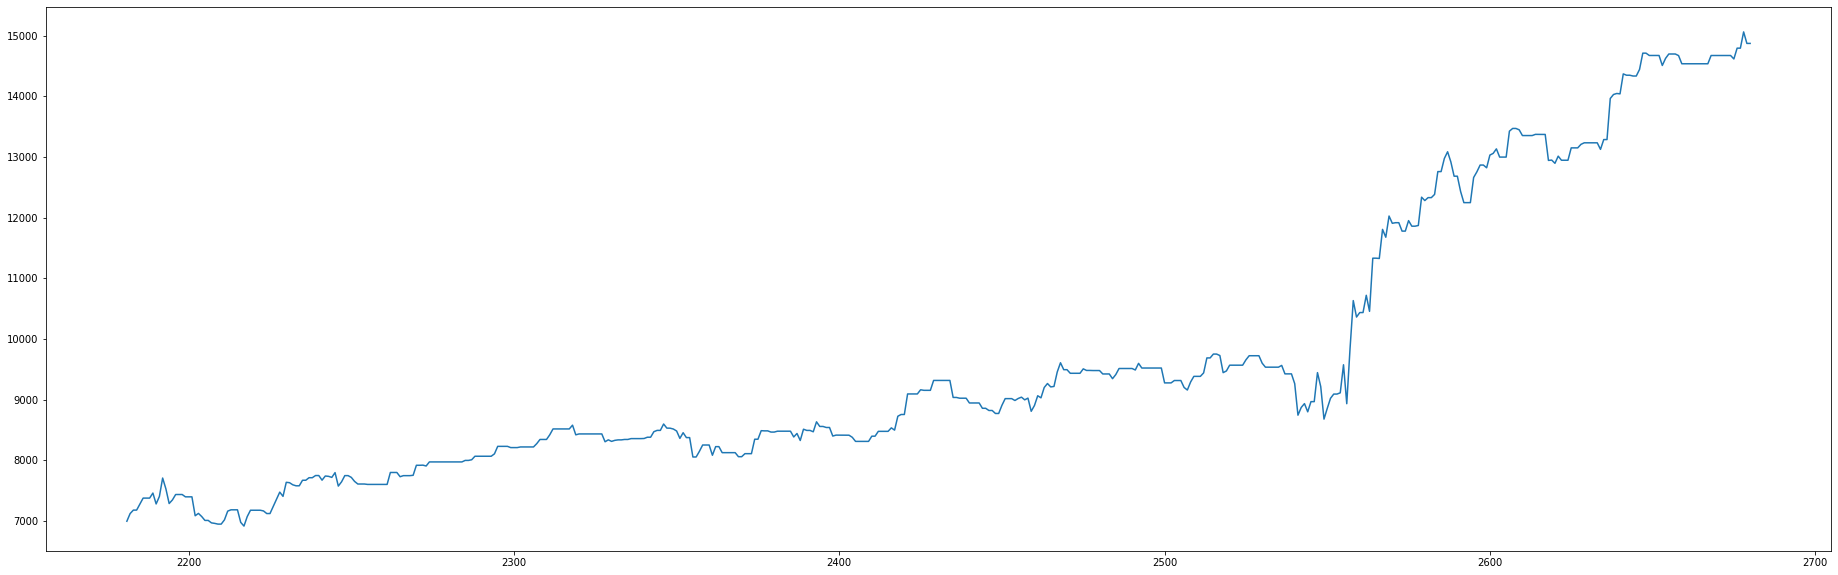

In [77]:
graf_my['Date'] = pd.to_datetime(graf_my['Date'])
plot_merg = pd.merge(graf_my, graf, on = 'Date', how = 'right', )
#
plot_merg.sort_values(by = 'Date', inplace = True)
plot_merg.fillna(0, inplace = True)

plot_merg = plot_merg.reset_index()

plot_merg['equity'] = nan
plot_merg['equity_my'] = nan
plot_merg['equity'][0]    = 100
plot_merg['equity_my'][0] = 100
for ii in range(1, len(plot_merg),1): 
    plot_merg['equity']   [ii] = (1+plot_merg['mean']     [ii]/100)*plot_merg['equity']   [ii-1]
    plot_merg['equity_my'][ii] = (1+plot_merg['Proft1000'][ii]/100)*plot_merg['equity_my'][ii-1]

plot_merg
#plot_merg.to_excel('dfd1.xlsx')

plt.figure(figsize=(32,10))
#plt.plot(plot_merg['equity'])
plt.plot(plot_merg['equity_my'][-500:])
# plt.xlabel(plot_merg['Date'].dt.year.any())
# plt.ylabel(plot_merg['equity'])
plt.show()

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000,Proft1000
date_time,,,,,,
2010,0.438372,1042,0.148615,154,0.370519,154
2011,0.282417,1066,-0.009287,156,0.174197,156
2012,0.108154,640,0.032892,110,0.236206,110
2013,0.251704,419,0.022456,108,0.037544,108
2014,0.380818,605,0.239135,127,0.347854,127
2015,0.322731,963,0.042846,163,0.271163,163
2016,0.176716,847,0.196930,130,0.329923,130
2017,0.181506,471,0.148091,120,0.211421,120


'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,,,
2010,0.543275,525,0.454526,119,0.546181,119
2011,0.299136,755,-0.017311,150,0.128867,150
2012,0.401496,252,0.002332,71,0.167308,71
2013,0.410656,204,0.355541,55,0.386499,55
2014,0.556626,539,0.391179,122,0.504217,122
2015,0.602576,732,0.371734,141,0.517236,141
2016,0.304366,495,0.312815,101,0.410920,101
2017,0.150145,307,0.041816,123,0.061890,123


'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830,Proft1830
date_time,,,,,,
2010,1.341995,281,0.769559,101,0.831913,101
2011,0.590223,305,-0.084693,109,0.048289,109
2012,0.599269,172,0.063258,36,0.220563,36
2013,0.589000,123,0.683328,32,0.755656,32
2014,0.384587,264,0.738070,58,1.008725,58
2015,0.684967,434,0.371449,82,0.472757,82
2016,0.730677,255,0.497144,62,0.550276,62
2017,0.316065,105,0.127289,37,0.369521,37


'10:50:00'

0.55

'все'

'по дням'

'по 1 по часам'

,mean,count,mean,count,mean,count
,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa
date_time,,,,,,
2010,0.356710,852,0.021984,116,0.224629,116
2011,0.090665,741,-0.059866,100,0.067721,100
2012,0.294858,457,0.010239,76,0.218980,76
2013,0.139780,318,-0.057010,69,-0.013031,69
2014,0.035945,609,0.095418,101,0.376835,101
2015,0.046604,891,-0.151817,131,0.082805,131
2016,0.245420,477,0.163589,85,0.264302,85
2017,0.124364,290,0.032417,76,0.168957,76


In [16]:
#сравниваем pivo3 and pivo3
tresh_comb = 0.55
tresh      = 0.55

pivo3_00 = pd.pivot_table(matrix_year[matrix_year['2proba'] > tresh],
                      index=['Year'],
                       values=['Profit_carrent'],
                       columns=['Target'],
                       aggfunc=['mean', 'count'],
                       margins=True
                      )
display(pivo3_00)
pivo3_r = pivo3[pivo3['Date'].dt.year.isin([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])] #убрали годы
pivo3_55 = pd.pivot_table(pivo3_r[pivo3_r[['2proba_Proft1000','2proba_Proft1300','2proba_Proft1830','2proba_ProftLaBa']].min(axis=1) > tresh_comb], 
                          index = 'Year', values = ['Pro_Morni','Profi_GEP','Proft1000','Proft1300','Proft1830','ProftLaBa'], aggfunc=['mean', 'count'],
                          margins=True
                         )                    
pivo3_55

mean                                                    \
       Profit_carrent                                                     
Target      Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa   
Year                                                                      
2013         0.221933  0.039703  0.003312 -0.072210 -0.081161  0.070014   
2014        -0.153860 -0.006602  0.150997  0.288552  0.971968  0.117365   
2015         0.420470  0.127889  0.257426  0.431788  0.265768  0.040081   
2016         0.226690  0.082537  0.291916  0.381296  0.567922  0.238870   
2017        -1.012785  0.055967  0.212954  0.109347  0.361057  0.085000   
2018        -0.409289  0.137041  0.271818  0.461695  0.855652  0.172516   
2019              NaN  0.132948  0.181958  0.140468  0.181860  0.036395   
2020         0.106161  0.499292  0.359150  0.543712  0.015755  0.046192   
All          0.026521  0.082258  0.192117  0.304096  0.310668  0.093282   

                          count                                          \
                 Profit_carrent                                           
Target       All      Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
Year                                                                      
2013    0.023239          294.0    6216.0    1866.0     727.0     812.0   
2014    0.064220          348.0    6615.0    1076.0     525.0     325.0   
2015    0.160454           41.0    6062.0     719.0     510.0     531.0   
2016    0.200847           63.0    2992.0     804.0     780.0     348.0   
2017    0.102109           14.0    1854.0     468.0     478.0     194.0   
2018    0.293485           31.0    1584.0    1161.0     834.0     366.0   
2019    0.138258            NaN     817.0     440.0     371.0     156.0   
2020    0.342058           58.0    1188.0    1027.0     746.0     514.0   
All     0.138171          849.0   27328.0    7561.0    4971.0    3246.0   

                         
                         
Target ProftLaBa    All  
Year                     
2013       654.0  10569  
2014       719.0   9608  
2015       642.0   8505  
2016       280.0   5267  
2017       258.0   3266  
2018       424.0   4400  
2019       221.0   2005  
2020       586.0   4119  
All       3784.0  47739

mean                                                       count  \
     Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa Pro_Morni   
Year                                                                         
2013 -0.084914  0.078993  0.251480  0.164307  0.222598  0.174426        43   
2014 -0.062044  0.122112  0.592509  0.521466  1.135769  0.458666        63   
2015  0.259475  0.267623 -0.016546  0.244914 -0.015328 -0.284305       176   
2016  0.102474  0.120748  0.334622  0.433307  0.674179  0.210498       118   
2017 -0.034213  0.068472  0.146437  0.113588  0.256321  0.079754       101   
2018  0.039574  0.291856  0.393046  0.436970  0.749776  0.108499       184   
2019 -0.242216  0.267918  0.247517  0.000777  0.123314 -0.021263        83   
2020 -0.301899  0.441872  0.509537  0.218576 -0.158225  0.054835       193   
All  -0.025333  0.250338  0.302508  0.279165  0.313762  0.049984       961   

                                                        
     Profi_GEP Proft1000 Proft1300 Proft1830 ProftLaBa  
Year                                                    
2013        43        43        43        43        43  
2014        63        63        63        63        63  
2015       176       176       176       176       176  
2016       118       118       118       118       118  
2017       101       101       101       101       101  
2018       184       184       184       184       184  
2019        83        83        83        83        83  
2020       193       193       193       193       193  
All        961       961       961       961       961

In [189]:
pivo3

,Symbol,Date,2proba_Pro_Morni,2proba_Profi_GEP,2proba_Proft1000,2proba_Proft1300,2proba_Proft1830,2proba_ProftLaBa,2proba,Pro_Morni,Profi_GEP,Proft1000,Proft1300,Proft1830,ProftLaBa,Year
0,GAZP,2007-01-09 10:50:00,0.395738,0.613336,0.526596,0.539945,0.540665,0.462492,0.513129,0.203359,-0.512767,-2.973295,-2.775982,-0.741623,-2.473210,2007
1,GAZP,2007-01-09 11:50:00,0.468902,0.598272,0.582430,0.551400,0.566837,0.539295,0.551189,0.203359,-0.512767,-3.742828,-3.547081,-1.528856,-3.246709,2007
2,GAZP,2007-01-09 12:50:00,0.472617,0.565475,0.528165,0.458449,0.553901,0.489350,0.511326,0.203359,-0.512767,-2.887398,-2.689911,-0.653751,-2.386871,2007
3,GAZP,2007-01-09 13:50:00,0.426713,0.545857,0.458733,0.402182,0.528872,0.512750,0.479185,0.203359,-0.512767,-2.658703,-2.460751,-0.419795,-2.156997,2007
4,GAZP,2007-01-09 14:50:00,0.383038,0.535361,0.484571,0.432438,0.523385,0.460851,0.469941,0.203359,-0.512767,-2.057005,-1.857830,0.195742,-1.552198,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,VTBR,2008-12-30 12:50:00,0.507155,0.512669,0.508013,0.477876,0.500733,0.478646,0.497515,4.504505,-1.479290,-0.597015,3.880597,1.492537,0.895522,2008
18856,VTBR,2008-12-30 13:50:00,0.518604,0.523268,0.514906,0.513207,0.500021,0.483106,0.508852,4.504505,-1.479290,-0.892857,3.571429,1.190476,0.595238,2008
18857,VTBR,2008-12-30 14:50:00,0.511704,0.523566,0.528291,0.524974,0.498319,0.504399,0.515209,4.504505,-1.479290,-0.892857,3.571429,1.190476,0.595238,2008
18858,VTBR,2008-12-30 15:50:00,0.472149,0.553458,0.564069,0.551498,0.507597,0.519710,0.528080,4.504505,-1.479290,-1.769912,2.654867,0.294985,-0.294985,2008


In [17]:
# ФУНКЦИЯ КОТОАРЯ РАБОТАЕТ ТОЛЬКО С  matrix_year ОЛЬШЕ НИЧЕГО ЕЙ НЕ НУЖНО

#переменные
na_re = 4 #число  совпаlений
#profit_anal = 'Proft1000' # какую профит смотрим СМОТРИМ ВСЕ В ЦИКЛЕ
tresh = 0.55 #порог



In [18]:
pivo1 = pd.pivot_table(matrix_year[matrix_year['2proba'] > tresh],
                      index=['date_time'],
                       values=['Profit_carrent'],
                       columns=['Target'],
                       aggfunc=['mean','count'],
                      # margins=True
                      )
display(pivo1.head(10))
pivo1.columns = ['Pro_Morni','Profi_GEP','Proft1000','Proft1300','Proft1830','ProftLaBa',   'C_Pro_Morni','C_Profi_GEP','C_Proft1000','C_Proft1300','C_Proft1830','C_ProftLaBa',]
#pivo1.columns = ['Proft1000','Proft1300','ProftLaBa',   'C_Proft1000','C_Proft1300','C_ProftLaBa',]

pivo1['namber'] = pivo1[['Proft1000','Proft1300','Proft1830','ProftLaBa']].apply(lambda x: x.notnull().sum(), axis='columns') # берем только таргеты 4 без гэпа и морнинга
display(pivo1.head(10))


mean                                          \
                    Profit_carrent                                           
Target                   Pro_Morni Profi_GEP Proft1000 Proft1300 Proft1830   
date_time                                                                    
2013-01-08 10:50:00       0.544743       NaN       NaN  0.315247  0.032649   
2013-01-08 11:50:00       0.711864       NaN  0.049823  0.922982       NaN   
2013-01-08 12:50:00            NaN       NaN  0.337216  0.562027  0.378091   
2013-01-08 13:50:00            NaN       NaN -0.140313  0.469627 -0.201460   
2013-01-08 14:50:00            NaN       NaN -0.143936  0.077111  0.224467   
2013-01-08 15:50:00            NaN -0.933155 -1.234248       NaN       NaN   
2013-01-08 16:50:00            NaN -0.933155 -0.341300  0.071182       NaN   
2013-01-09 10:50:00            NaN -0.013542       NaN       NaN       NaN   
2013-01-09 11:50:00            NaN  0.249486  0.377744       NaN       NaN   
2013-01-09 12:50:00            NaN -0.018606       NaN       NaN       NaN   

                                       count                                \
                              Profit_carrent                                 
Target              ProftLaBa      Pro_Morni Profi_GEP Proft1000 Proft1300   
date_time                                                                    
2013-01-08 10:50:00  0.222249            4.0       NaN       NaN       2.0   
2013-01-08 11:50:00  0.178347            1.0       NaN       2.0       1.0   
2013-01-08 12:50:00  0.225591            NaN       NaN       1.0       1.0   
2013-01-08 13:50:00  0.050045            NaN       NaN       2.0       1.0   
2013-01-08 14:50:00 -0.262490            NaN       NaN       2.0       2.0   
2013-01-08 15:50:00 -0.142114            NaN       1.0       1.0       NaN   
2013-01-08 16:50:00  0.010005            NaN       1.0       2.0       1.0   
2013-01-09 10:50:00       NaN            NaN       5.0       NaN       NaN   
2013-01-09 11:50:00       NaN            NaN       6.0       1.0       NaN   
2013-01-09 12:50:00       NaN            NaN       4.0       NaN       NaN   

                                         
                                         
Target              Proft1830 ProftLaBa  
date_time                                
2013-01-08 10:50:00       2.0       2.0  
2013-01-08 11:50:00       NaN       2.0  
2013-01-08 12:50:00       1.0       4.0  
2013-01-08 13:50:00       2.0       3.0  
2013-01-08 14:50:00       1.0       6.0  
2013-01-08 15:50:00       NaN       4.0  
2013-01-08 16:50:00       NaN       3.0  
2013-01-09 10:50:00       NaN       NaN  
2013-01-09 11:50:00       NaN       NaN  
2013-01-09 12:50:00       NaN       NaN

,Pro_Morni,Profi_GEP,Proft1000,Proft1300,Proft1830,ProftLaBa,C_Pro_Morni,C_Profi_GEP,C_Proft1000,C_Proft1300,C_Proft1830,C_ProftLaBa,namber
date_time,,,,,,,,,,,,,
2013-01-08 10:50:00,0.544743,NaN,NaN,0.315247,0.032649,0.222249,4.0,NaN,NaN,2.0,2.0,2.0,3
2013-01-08 11:50:00,0.711864,NaN,0.049823,0.922982,NaN,0.178347,1.0,NaN,2.0,1.0,NaN,2.0,3
2013-01-08 12:50:00,NaN,NaN,0.337216,0.562027,0.378091,0.225591,NaN,NaN,1.0,1.0,1.0,4.0,4
2013-01-08 13:50:00,NaN,NaN,-0.140313,0.469627,-0.201460,0.050045,NaN,NaN,2.0,1.0,2.0,3.0,4
2013-01-08 14:50:00,NaN,NaN,-0.143936,0.077111,0.224467,-0.262490,NaN,NaN,2.0,2.0,1.0,6.0,4
2013-01-08 15:50:00,NaN,-0.933155,-1.234248,NaN,NaN,-0.142114,NaN,1.0,1.0,NaN,NaN,4.0,2
2013-01-08 16:50:00,NaN,-0.933155,-0.341300,0.071182,NaN,0.010005,NaN,1.0,2.0,1.0,NaN,3.0,3
2013-01-09 10:50:00,NaN,-0.013542,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0
2013-01-09 11:50:00,NaN,0.249486,0.377744,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,1


In [19]:
pivo1.describe()
pivo2 = pivo1[pivo1['namber'] >= na_re]
k1 = []
for oo in range(len(pivo2)):
    if pivo2.index[oo].date() != pivo2.index[oo-1].date():
        k = 1
    else:
        k+=1
    k1.append(k)
k1        
pivo2['long'] = k1

pivo2
pivo3 = pivo2[pivo2['long'] == 1] #первый на дню
for ll in ['Pro_Morni','Profi_GEP','Proft1000','Proft1300','Proft1830','ProftLaBa']:
    pivo4 = pd.pivot_table(pivo3,
                          index = pivo3.index.year,
                           values=ll,
                           aggfunc=['mean', 'count', 'min', 'max'],
                           margins=True
                          )  


    display(pivo4)

,mean,count,min,max
,Pro_Morni,Pro_Morni,Pro_Morni,Pro_Morni
2013,-0.151517,8,-1.588776,1.673374
2014,0.085346,26,-3.004604,3.182822
2016,0.917915,2,0.073099,1.762731
2020,2.806122,1,2.806122,2.806122
All,0.152671,37,-3.004604,3.182822
2015,NaN,0,NaN,NaN
2017,NaN,0,NaN,NaN
2018,NaN,0,NaN,NaN
2019,NaN,0,NaN,NaN


,mean,count,min,max
,Profi_GEP,Profi_GEP,Profi_GEP,Profi_GEP
date_time,,,,
2013,0.089720,33,-1.490674,1.449119
2014,0.220078,51,-3.318145,3.153635
2015,0.186609,89,-1.658631,1.766192
2016,-0.017190,54,-3.728829,2.426628
2017,0.221883,43,-0.789376,1.653536
2018,0.227963,64,-3.519856,2.755452
2019,0.249801,43,-1.004855,1.902039
2020,0.203353,59,-9.701711,5.379607


,mean,count,min,max
,Proft1000,Proft1000,Proft1000,Proft1000
date_time,,,,
2013,0.046302,43,-2.016528,2.682682
2014,0.248693,59,-9.464504,7.074560
2015,0.232345,91,-4.124281,5.391246
2016,0.306787,56,-4.261636,3.595708
2017,0.223954,51,-3.057516,2.449694
2018,0.463755,69,-7.089422,4.141462
2019,0.206070,48,-3.020797,3.869262
2020,-0.019549,65,-11.996872,13.047309


,mean,count,min,max
,Proft1300,Proft1300,Proft1300,Proft1300
date_time,,,,
2013,0.173158,43,-3.095238,4.153570
2014,0.592993,59,-8.879282,19.245142
2015,0.292177,91,-6.141367,7.688832
2016,0.355098,56,-3.334926,4.753863
2017,0.239735,51,-4.703870,3.656809
2018,0.588141,69,-10.200760,8.001873
2019,0.013981,48,-3.029040,2.979275
2020,0.157894,65,-11.823989,17.402873


,mean,count,min,max
,Proft1830,Proft1830,Proft1830,Proft1830
date_time,,,,
2013,-0.240496,43,-8.423493,4.100812
2014,0.948807,59,-3.526871,17.806428
2015,0.019670,91,-6.701429,6.281883
2016,0.618338,56,-3.744947,6.406185
2017,0.322262,51,-3.819137,4.955642
2018,0.610348,69,-8.844276,6.553540
2019,-0.023195,48,-3.185397,2.582765
2020,-0.185373,65,-15.047554,11.813594


,mean,count,min,max
,ProftLaBa,ProftLaBa,ProftLaBa,ProftLaBa
date_time,,,,
2013,-0.010467,43,-1.687052,3.053435
2014,0.240309,59,-5.104799,4.993723
2015,-0.057218,91,-3.639540,3.447693
2016,0.365460,56,-1.823570,2.806324
2017,0.087976,51,-3.789279,1.757114
2018,0.176102,69,-5.967293,5.347178
2019,-0.003540,48,-2.230742,3.124249
2020,0.027177,65,-5.033238,11.322070


,mean,count
,Proft1000,Proft1000
10:45:00,2.740797,5
11:45:00,0.561842,5
12:45:00,0.632109,28
13:45:00,0.471562,105
All,0.585498,143


,mean,count
,Proft1300,Proft1300
10:45:00,2.614796,5
11:45:00,0.363369,5
12:45:00,0.706022,28
13:45:00,0.571994,105
All,0.662369,143


,mean,count
,Proft1830,Proft1830
10:45:00,3.314291,5
11:45:00,0.255331,5
12:45:00,0.510192,28
13:45:00,0.545417,105
All,0.625191,143


,mean,count
,ProftLaBa,ProftLaBa
10:45:00,2.543375,5
11:45:00,0.173363,5
12:45:00,0.480153,28
13:45:00,0.573578,105
All,0.610166,143


,mean,count
,Proft1000,Proft1000
date_time,,
2010,0.516307,40
2011,0.396233,62
2012,0.458228,23
2013,0.583476,19
2014,0.560509,43
2015,0.334464,63
2016,0.573455,39
2017,0.276000,38


,mean,count
,Proft1300,Proft1300
date_time,,
2010,0.559504,40
2011,0.337822,62
2012,0.504631,23
2013,0.459407,19
2014,0.922171,43
2015,0.348676,63
2016,0.682813,39
2017,0.280488,38


,mean,count
,Proft1830,Proft1830
date_time,,
2010,0.567953,40
2011,0.561916,62
2012,0.579721,23
2013,0.455690,19
2014,0.802708,43
2015,0.353599,63
2016,0.785053,39
2017,0.275375,38


,mean,count
,ProftLaBa,ProftLaBa
date_time,,
2010,0.487267,40
2011,0.458407,62
2012,0.475487,23
2013,0.495439,19
2014,0.788865,43
2015,0.447673,63
2016,0.646613,39
2017,0.297090,38


count                   mean          \
                   Profit_carrent Target_ Profit_carrent Target_   
Target    from_                                                    
Proft1000 10:45:00             45      45           0.87    0.44   
          11:45:00             79      79           0.42    0.52   
          12:45:00             58      58           0.38    0.57   
          13:45:00            142     142           0.48    0.50   
          14:45:00             21      21          -0.24    0.48   
          15:45:00            162     162           0.45    0.46   
          16:45:00             18      18          -0.34    0.50   
Proft1300 10:45:00             45      45           0.94    0.44   
          11:45:00             79      79           0.56    0.52   
          12:45:00             58      58           0.11    0.57   
          13:45:00            142     142           0.68    0.50   
          14:45:00             21      21           0.10    0.48   
          15:45:00            162     162           0.48    0.46   
          16:45:00             18      18          -0.32    0.50   
ProftLaBa 10:45:00             45      45           0.04    0.44   
          11:45:00             79      79           0.32    0.52   
          12:45:00             58      58          -0.14    0.57   
          13:45:00            142     142           0.10    0.50   
          14:45:00             21      21          -0.71    0.48   
          15:45:00            162     162           0.19    0.46   
          16:45:00             18      18          -0.38    0.50   
All                          1575    1575           0.34    0.49   

                            count                   mean          
                   Profit_carrent Target_ Profit_carrent Target_  
Target    from_                                                   
Proft1000 10:45:00          12307   12307           0.02    0.39  
          11:45:00          12273   12273           0.03    0.39  
          12:45:00          12294   12294           0.04    0.39  
          13:45:00          12210   12210           0.04    0.39  
          14:45:00          12331   12331           0.05    0.39  
          15:45:00          12190   12190           0.04    0.38  
          16:45:00          12334   12334           0.05    0.38  
Proft1300 10:45:00          12307   12307           0.01    0.39  
          11:45:00          12273   12273           0.02    0.39  
          12:45:00          12294   12294           0.03    0.39  
          13:45:00          12210   12210           0.03    0.39  
          14:45:00          12331   12331           0.03    0.39  
          15:45:00          12190   12190           0.02    0.38  
          16:45:00          12334   12334           0.03    0.38  
ProftLaBa 10:45:00          12307   12307           0.01    0.39  
          11:45:00          12273   12273           0.02    0.39  
          12:45:00          12294   12294           0.03    0.39  
          13:45:00          12210   12210           0.03    0.39  
          14:45:00          12331   12331           0.03    0.39  
          15:45:00          12190   12190           0.02    0.38  
          16:45:00          12334   12334           0.03    0.38  
All                        257817  257817           0.03    0.39

In [16]:
from_  = '10:45:00'
Target = 'Proft1300'
varP = 0.5
ss      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss.columns = ['mean', 'count']
display(ss.shape)

from_  = '11:45:00'
#Target = 'Proft1000'

ss1      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss1.columns = ['mean', 'count']
display(ss1.shape)

from_  = '11:45:00'
#Target = 'Proft1000'

ss2      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss2.columns = ['mean', 'count']
display(ss2.shape)

all = pd.merge(ss,  ss1, on = 'Date', how='outer')
#display(all)
display(all.shape)
all = pd.merge(all, ss2, on = 'Date', how='outer')
all.sort_index(inplace=True)
display(all.shape)
all.columns = ['13:45:00mean', 'count','14:45:00mean', 'count','15:45:00mean', 'count',]

all['mean'] = all['13:45:00mean'].fillna(all['14:45:00mean']).fillna(all['15:45:00mean'])
all

all_pivo1    = pd.pivot_table(all, index=all.index.year, values=['13:45:00mean'], aggfunc=['mean', 'count'], margins=True)
all_pivo2    = pd.pivot_table(all, index=all.index.year, values=['14:45:00mean'], aggfunc=['mean', 'count'], margins=True)
all_pivo3    = pd.pivot_table(all, index=all.index.year, values=['15:45:00mean'], aggfunc=['mean', 'count'], margins=True)
all_pivo4    = pd.pivot_table(all, index=all.index.year, values=['mean']  , aggfunc=['mean', 'count'], margins=True)

all_pivo     = pd.concat([all_pivo1,all_pivo2,all_pivo3,all_pivo4], axis=1)
all_pivo.columns = ['13:45:00mean', 'count', '14:45:00mean', 'count','15:45:00mean', 'count','MEAN', 'COUNT',]

#all_pivo.sort_index(inplace=True)
all_pivo


(27, 2)

(25, 2)

(25, 2)

(38, 4)

(38, 6)

,13:45:00mean,count,14:45:00mean,count,15:45:00mean,count,MEAN,COUNT
2010,0.932213,7,3.386022,3,3.386022,3,1.016830,8
2011,0.532963,9,1.977596,8,1.977596,8,0.604435,13
2012,5.604518,1,2.020839,1,2.020839,1,5.604518,1
2013,-1.223559,1,-0.272194,1,-0.272194,1,-1.223559,1
2014,1.129706,5,1.103454,10,1.103454,10,1.111829,10
2015,-0.952231,3,NaN,0,NaN,0,-0.952231,3
2016,2.969822,1,3.580067,1,3.580067,1,2.969822,1
All,0.794992,27,1.579472,25,1.579472,25,0.756563,38
2017,NaN,0,-2.855279,1,-2.855279,1,-2.855279,1


In [330]:
from_  = '13:45:00'
Target = 'Proft1000'
varP = 0.5

ss      = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)]
                         , values=['Profit_carrent'], index=['Date'], aggfunc=['mean', 'count'])

ss.columns = ['mean', 'count']
ss
ss_next = pd.pivot_table(ss, values=['mean'], index=ss.index.year, aggfunc=['mean', 'count'], margins=True)
display(ss_next)
# ss.to_excel('sss.xlsx')
ss_comp = pd.pivot_table(matrix_year[(matrix_year['2proba']>=varP) & (matrix_year['from_'] == from_) & (matrix_year['Target']==Target)], 
                         values=['Profit_carrent'], index=['Year'], aggfunc=['mean', 'count'], margins=True)
ss_comp

,mean,count
,mean,mean
Date,,
2010,0.450845,34
2011,0.693576,38
2012,0.263599,16
2013,0.619770,11
2014,0.718972,44
2015,0.459171,34
2016,0.717551,27
2017,0.123885,13


,mean,count
,Profit_carrent,Profit_carrent
Year,,
2010,0.542626,48
2011,0.889472,62
2012,0.116372,22
2013,0.508389,12
2014,0.637720,76
2015,0.306850,72
2016,0.717516,35
2017,0.243350,16


In [139]:
pd.options.display.max_rows=2000
all = ['from_', 'Target', ]
result_(0.525,0.525)

count                   mean          \
                   Profit_carrent Target_ Profit_carrent Target_   
from_    Target                                                    
10:45:00 Pro_Morni            317     317           0.23    0.54   
         Profi_GEP           9594    9594           0.05    0.55   
         Proft1000           4406    4406           0.10    0.52   
         Proft1300           3392    3392          -0.00    0.52   
         Proft1830           3548    3548          -0.02    0.50   
         ProftLaBa           1344    1344           0.03    0.50   
12:45:00 Pro_Morni             80      80          -0.39    0.51   
         Profi_GEP          10399   10399           0.08    0.55   
         Proft1000           5782    5782           0.22    0.55   
         Proft1300           4229    4229           0.18    0.53   
         Proft1830           3395    3395           0.19    0.53   
         ProftLaBa           3209    3209           0.16    0.53   
14:45:00 Pro_Morni             63      63          -1.28    0.37   
         Profi_GEP          10979   10979           0.08    0.54   
         Proft1000           9040    9040           0.21    0.55   
         Proft1300           5891    5891           0.23    0.54   
         Proft1830           5552    5552           0.16    0.52   
         ProftLaBa           7151    7151           0.10    0.53   
16:45:00 Pro_Morni            258     258          -0.12    0.50   
         Profi_GEP           9977    9977           0.10    0.55   
         Proft1000           7872    7872           0.21    0.55   
         Proft1300           5304    5304           0.23    0.54   
         Proft1830           2554    2554           0.13    0.51   
         ProftLaBa           4530    4530           0.11    0.55   
All                        118866  118866           0.13    0.54   

                            count                   mean          
                   Profit_carrent Target_ Profit_carrent Target_  
from_    Target                                                   
10:45:00 Pro_Morni           8213    8213          -0.03    0.48  
         Profi_GEP             12      12           0.40    0.58  
         Proft1000           4061    4061           0.01    0.47  
         Proft1300           4468    4468          -0.03    0.47  
         Proft1830           3207    3207           0.01    0.47  
         ProftLaBa           5669    5669           0.03    0.48  
12:45:00 Pro_Morni           7119    7119          -0.01    0.48  
         Profi_GEP            158     158           0.31    0.53  
         Proft1000           1710    1710          -0.08    0.45  
         Proft1300           2126    2126          -0.13    0.46  
         Proft1830           1203    1203           0.17    0.50  
         ProftLaBa           5971    5971          -0.03    0.48  
14:45:00 Pro_Morni           6893    6893           0.00    0.49  
         Profi_GEP            128     128          -0.80    0.55  
         Proft1000            814     814          -0.28    0.44  
         Proft1300            849     849          -0.14    0.47  
         Proft1830           1339    1339          -0.16    0.46  
         ProftLaBa           2307    2307          -0.10    0.47  
16:45:00 Pro_Morni           9480    9480          -0.03    0.48  
         Profi_GEP            329     329          -0.50    0.52  
         Proft1000            251     251          -1.04    0.52  
         Proft1300            283     283          -0.29    0.47  
         Proft1830            140     140           0.72    0.54  
         ProftLaBa           5255    5255          -0.05    0.48  
All                         71985   71985          -0.03    0.48

In [173]:
feat_importances

,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
0,Cl/min_day,0.021,Cl/min_day,0.039,Cl/min_day,0.028,Cl/min_day,0.023,Cl/min_day,0.031,...,Cl/min_day,0.008,Cl/min_day,0.025,Cl/min_day,0.008,Cl/min_day,0.019,Cl/min_day,0.019
1,Cl/max_day,0.003,Cl/max_day,0.002,Cl/max_day,0.006,Cl/max_day,0.004,Cl/max_day,0.000,...,Cl/max_day,0.010,Cl/max_day,0.021,Cl/max_day,0.008,Cl/max_day,0.014,Cl/max_day,0.028
2,max_day-min_day,0.000,max_day-min_day,0.000,max_day-min_day,0.004,max_day-min_day,0.009,max_day-min_day,0.006,...,max_day-min_day,0.006,max_day-min_day,0.006,max_day-min_day,0.000,max_day-min_day,0.005,max_day-min_day,0.000
3,ADX_5,0.006,ADX_5,0.003,ADX_5,0.000,ADX_5,0.005,ADX_5,0.000,...,ADX_5,0.008,ADX_5,0.003,ADX_5,0.003,ADX_5,0.000,ADX_5,0.003
4,ADX_14,0.006,ADX_14,0.004,ADX_14,0.000,ADX_14,0.014,ADX_14,0.014,...,ADX_14,0.000,ADX_14,0.000,ADX_14,0.004,ADX_14,0.010,ADX_14,0.003
5,ADX_28,0.000,ADX_28,0.000,ADX_28,0.000,ADX_28,0.005,ADX_28,0.003,...,ADX_28,0.000,ADX_28,0.000,ADX_28,0.008,ADX_28,0.002,ADX_28,0.006
6,ADXR_5,0.005,ADXR_5,0.007,ADXR_5,0.003,ADXR_5,0.002,ADXR_5,0.000,...,ADXR_5,0.003,ADXR_5,0.000,ADXR_5,0.002,ADXR_5,0.000,ADXR_5,0.005
7,ADXR_14,0.000,ADXR_14,0.008,ADXR_14,0.002,ADXR_14,0.002,ADXR_14,0.009,...,ADXR_14,0.004,ADXR_14,0.004,ADXR_14,0.003,ADXR_14,0.005,ADXR_14,0.008
8,ADXR_28,0.005,ADXR_28,0.015,ADXR_28,0.000,ADXR_28,0.003,ADXR_28,0.004,...,ADXR_28,0.000,ADXR_28,0.007,ADXR_28,0.002,ADXR_28,0.000,ADXR_28,0.000
9,APO_5,0.002,APO_5,0.000,APO_5,0.000,APO_5,0.007,APO_5,0.000,...,APO_5,0.007,APO_5,0.004,APO_5,0.011,APO_5,0.003,APO_5,0.002


In [120]:

#прогнозы
def result_(varP, varM):
    tablep = pd.pivot_table(
    matrix_year[(matrix_year['2proba']>=varP) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    
    tablem = pd.pivot_table(
    matrix_year[(matrix_year['1proba']>varM) &(matrix_year[column] >200)],                      
            margins=True, index=all, values = ['Target_','Profit_carrent'],
            aggfunc=['count', 'mean']).round(2)
    table = pd.concat([tablep, tablem], axis=1)
#    table.columns = ['Profit%_c','Count','Profit%','Profit+-']
#    table.pop('Profit%_c')
    return table